## まずは自力でEDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import cv2
import ast

%matplotlib inline

In [2]:
train = pd.read_csv('../input/ranzcr-clip-catheter-line-classification/train.csv')
train_annotations = pd.read_csv('../input/ranzcr-clip-catheter-line-classification/train_annotations.csv')
test = pd.read_csv('../input/ranzcr-clip-catheter-line-classification/sample_submission.csv')
display(train.head())
display(train_annotations.head())
display(test.head())

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
0,1.2.826.0.1.3680043.8.498.46923145579096002617...,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.84006870182611080091...,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.12219033294413119947...,0,0,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.84994474380235968109...,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.35798987793805669662...,0,0,0,0,0,0,0,0,0,0,0


In [3]:
print(len(train))
print(len(train_annotations))
print(len(test))

30083
17999
3582


In [4]:
print(train['StudyInstanceUID'].nunique())
print(train['PatientID'].nunique())

30083
3255


In [5]:
train[train['PatientID'] == train['PatientID'][0]]

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
14759,1.2.826.0.1.3680043.8.498.13669042249425506984...,0,0,0,0,0,0,1,0,1,0,0,ec89415d1
17788,1.2.826.0.1.3680043.8.498.12069601668869166279...,0,0,0,0,0,1,0,0,0,1,0,ec89415d1
25311,1.2.826.0.1.3680043.8.498.76602365606870209106...,0,0,0,0,1,0,0,0,1,0,0,ec89415d1
26869,1.2.826.0.1.3680043.8.498.58735051192792195566...,0,0,0,0,0,0,0,0,1,0,0,ec89415d1
29077,1.2.826.0.1.3680043.8.498.34482941866634300538...,0,0,0,0,0,0,0,1,0,0,0,ec89415d1


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
PatientID,,,,,,,,,,,,
003e65ddb,3,3,3,3,3,3,3,3,3,3,3,3
00757839e,4,4,4,4,4,4,4,4,4,4,4,4
008d12164,16,16,16,16,16,16,16,16,16,16,16,16
009cedf2b,3,3,3,3,3,3,3,3,3,3,3,3
009de0875,9,9,9,9,9,9,9,9,9,9,9,9


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='StudyInstanceUID', ylabel='count'>

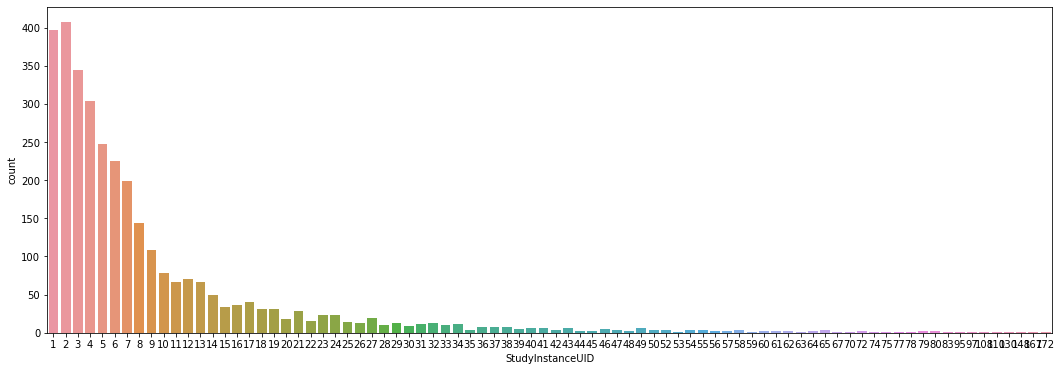

In [6]:
display(train.groupby(by='PatientID').count().head())
plt.figure(figsize=(18, 6))
sns.countplot(train.groupby(by='PatientID').count()['StudyInstanceUID'])

In [7]:
# 複数のデータが同じ患者に属している場合があるため、CVを切るときは一つのfoldに患者をまとめた方が良さそう。

In [8]:
train2 = train.drop(['StudyInstanceUID', 'PatientID'], axis=1)
print(train2.sum(axis=0))
# 案の定クラスの割合は不均衡だった。

ETT - Abnormal                   79
ETT - Borderline               1138
ETT - Normal                   7240
NGT - Abnormal                  279
NGT - Borderline                529
NGT - Incompletely Imaged      2748
NGT - Normal                   4797
CVC - Abnormal                 3195
CVC - Borderline               8460
CVC - Normal                  21324
Swan Ganz Catheter Present      830
dtype: int64


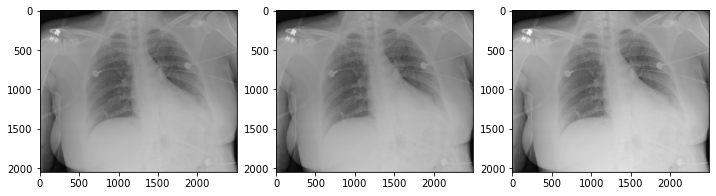

In [9]:
BASE_DIR_TRAIN = '../input/ranzcr-clip-catheter-line-classification/train/'
BASE_DIR_TEST = '../input/ranzcr-clip-catheter-line-classification/test/'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))

im = cv2.imread(BASE_DIR_TRAIN  + train['StudyInstanceUID'][0] + '.jpg')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_mean =  im.mean(axis=2)

axes[0].imshow(im)
axes[1].imshow(im_rgb)
axes[2].imshow(im_mean, cmap='gray')

# 白黒画像にしてもほとんど何も変わらないように見える。

In [10]:
im_1 = im[:, :, 0]
im_2 = im[:, :, 1]
im_3 = im[:, :, 2]

In [11]:
(im_1 == im_2).sum()
# 全部同じ

5120000

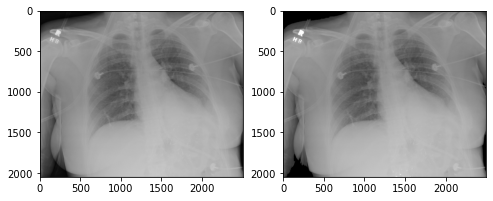

In [12]:
mask = im > 50
im_ = np.where(im < 50, 0, im)
im_ = np.where(im_ > 200, 255, im_)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_, cmap='gray')

# 閾値を設定して適当に切っても良さそう。

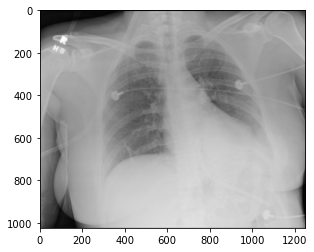

In [13]:
h, w = im_mean.shape
im_mean_2 = cv2.resize(im_mean, (int(w*0.5), int(h*0.5)))
plt.imshow(im_mean_2, cmap='gray')
# 画像は適当に小さくしても良さそう

In [14]:
ID = train_annotations['StudyInstanceUID'][0]
data = train_annotations['data'][0]
data = np.array(ast.literal_eval(data))
# ast.literal_eval を使うと、strからlistなどに変換できるらしい。

In [15]:
train[train['StudyInstanceUID'] == ID]

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
857,1.2.826.0.1.3680043.8.498.12616281126973421762...,0,0,0,0,0,0,0,0,0,1,0,ac2e8d106


In [16]:
print(len(data[:, 0]))
print(len(data[:, 1]))

16
16


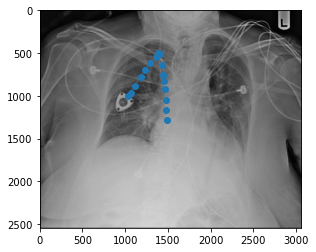

In [17]:
im = cv2.imread(BASE_DIR_TRAIN + ID + '.jpg')
plt.imshow(im)
plt.scatter(data[:, 0], data[:, 1])
# annotationデータの使い方のイメージがいまいちわかない。
# 画像を縮小して使う場合、annotationデータも合わせて縮小しなければいけなくなる。

In [18]:
def image_show(label):
    train_annotations_ = train_annotations[train_annotations['label'] == label].reset_index(drop=True)
    ID = train_annotations_['StudyInstanceUID'][0]
    data = train_annotations_['data'][0]
    data = np.array(ast.literal_eval(data))
    im = cv2.imread(BASE_DIR_TRAIN + ID + '.jpg')
    print(f'label: {label}')
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(im)
    axes[1].imshow(im)
    axes[1].scatter(data[:, 0], data[:, 1])
    plt.show()

In [19]:
labels = ['ETT - Normal', 'ETT - Borderline', 'ETT - Abnormal', 
          'NGT - Normal', 'NGT - Borderline', 'NGT - Abnormal', 'NGT - Incompletely Imaged', 
          'CVC - Normal', 'CVC - Borderline', 'CVC - Abnormal', 
          'Swan Ganz Catheter Present']

label: ETT - Normal


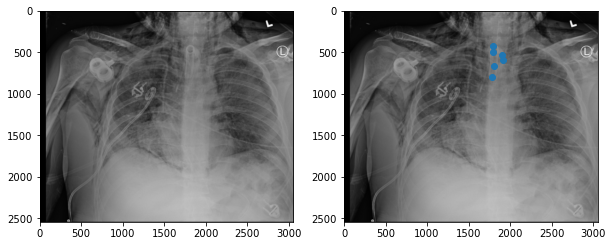

label: ETT - Borderline


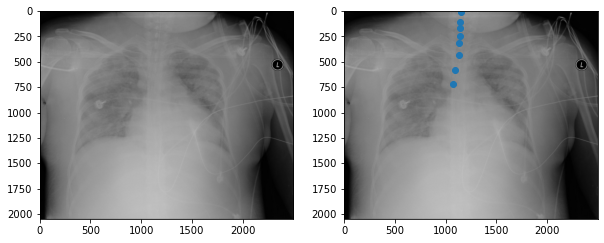

label: ETT - Abnormal


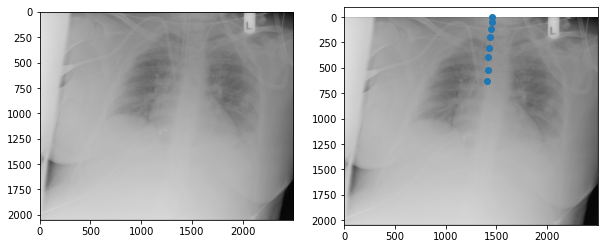

label: NGT - Normal


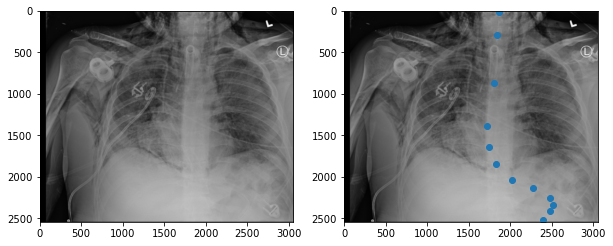

label: NGT - Borderline


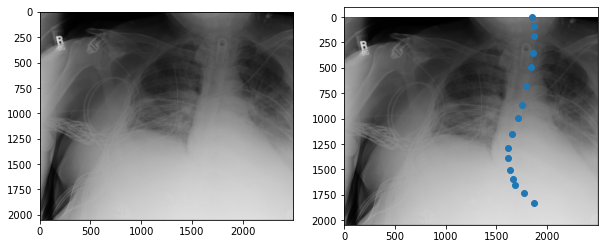

label: NGT - Abnormal


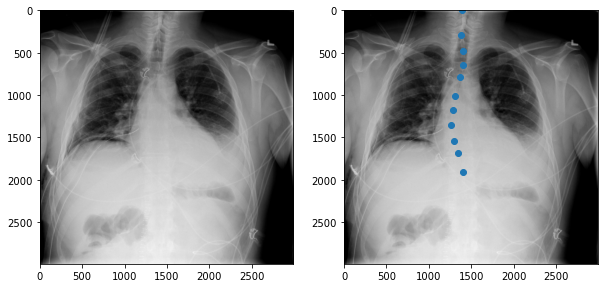

label: NGT - Incompletely Imaged


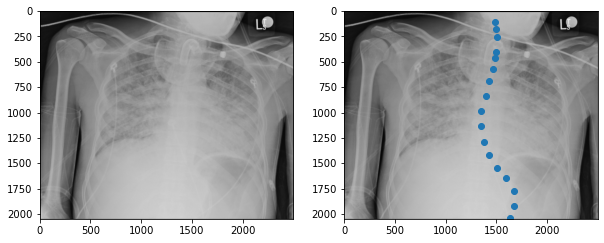

label: CVC - Normal


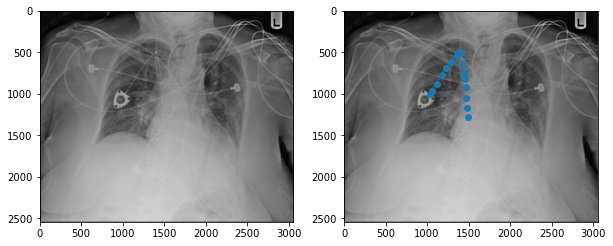

label: CVC - Borderline


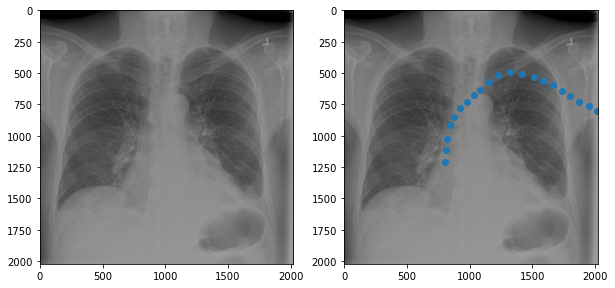

label: CVC - Abnormal


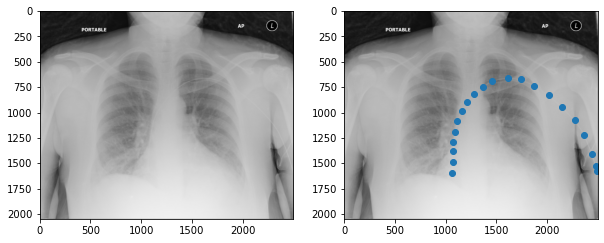

label: Swan Ganz Catheter Present


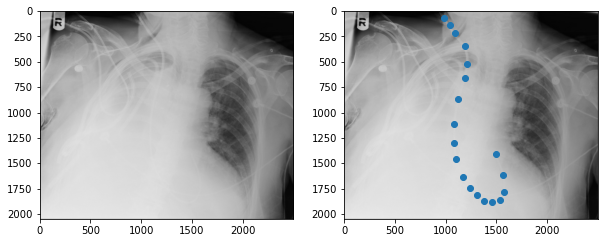

In [20]:
for label in labels: 
    image_show(label)

In [21]:
train2.mean(axis=0)

ETT - Abnormal                0.002626
ETT - Borderline              0.037829
ETT - Normal                  0.240667
NGT - Abnormal                0.009274
NGT - Borderline              0.017585
NGT - Incompletely Imaged     0.091347
NGT - Normal                  0.159459
CVC - Abnormal                0.106206
CVC - Borderline              0.281222
CVC - Normal                  0.708839
Swan Ganz Catheter Present    0.027590
dtype: float64

In [22]:
for label, score in zip(train2.mean(axis=0).index, train2.mean(axis=0)):
    test[label] = score
test

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
0,1.2.826.0.1.3680043.8.498.46923145579096002617...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
1,1.2.826.0.1.3680043.8.498.84006870182611080091...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
2,1.2.826.0.1.3680043.8.498.12219033294413119947...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
3,1.2.826.0.1.3680043.8.498.84994474380235968109...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
4,1.2.826.0.1.3680043.8.498.35798987793805669662...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
...,...,...,...,...,...,...,...,...,...,...,...,...
3577,1.2.826.0.1.3680043.8.498.81464483108873296584...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
3578,1.2.826.0.1.3680043.8.498.33579133018211530710...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
3579,1.2.826.0.1.3680043.8.498.61472811086105902907...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759
3580,1.2.826.0.1.3680043.8.498.19434375795525494655...,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.02759


In [23]:
OUTPUT_DIR = './'
test.to_csv(OUTPUT_DIR + 'submission.csv', index=False)